In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

In [2]:
dataset1 = pd.read_csv("diamonds.csv")
dataset2_11 = pd.read_csv("pp_gas_emission/gt_2011.csv")
dataset2_12 = pd.read_csv("pp_gas_emission/gt_2012.csv")
dataset2_13 = pd.read_csv("pp_gas_emission/gt_2013.csv")
dataset2_14 = pd.read_csv("pp_gas_emission/gt_2014.csv")
dataset2_15 = pd.read_csv("pp_gas_emission/gt_2015.csv")

In [3]:
dataset2_11["year"] = "2011"
dataset2_11.to_csv("dataset2_11.csv", index=False)

dataset2_12["year"] = "2012"
dataset2_12.to_csv("dataset2_12.csv", index=False)

dataset2_13["year"] = "2013"
dataset2_13.to_csv("dataset2_13.csv", index=False)

dataset2_14["year"] = "2014"
dataset2_14.to_csv("dataset2_14.csv", index=False)

dataset2_15["year"] = "2015"
dataset2_15.to_csv("dataset2_15.csv", index=False)

In [4]:
concat = pd.concat([dataset2_11, dataset2_12, dataset2_13, dataset2_14, dataset2_15])

In [5]:
new_gas = concat.drop(['CO'], axis=1)                                          

In [6]:
gas_enc = pd.get_dummies(new_gas, columns=['year'], drop_first=False)
print('Dataframe after one-hot encoding categorical variables:')
print(gas_enc)

Dataframe after one-hot encoding categorical variables:
          AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  12

In [7]:
gasemission = gas_enc.copy(deep=True)

In [8]:
gasemission.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,year_2011,year_2012,year_2013,year_2014,year_2015
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952,1,0,0,0,0
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377,1,0,0,0,0
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776,1,0,0,0,0
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505,1,0,0,0,0
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028,1,0,0,0,0


AT


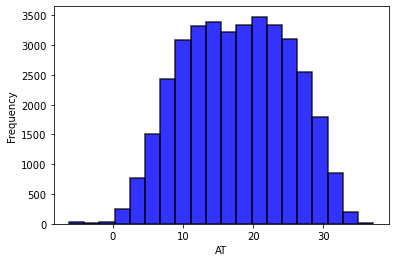

AP


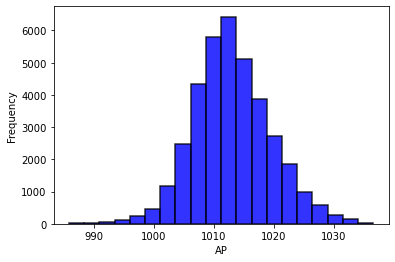

AH


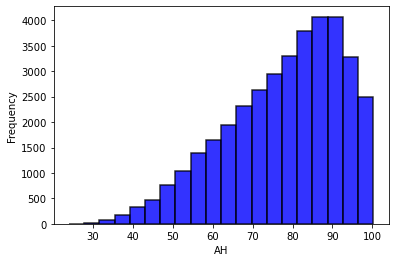

AFDP


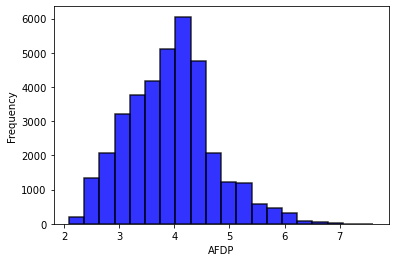

GTEP


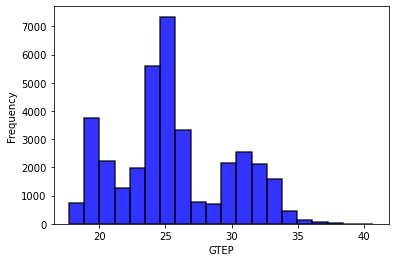

TIT


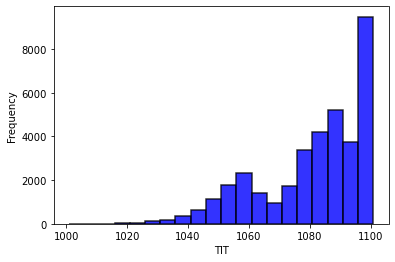

TAT


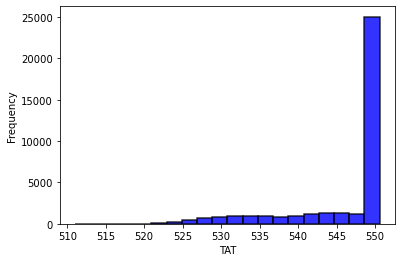

TEY


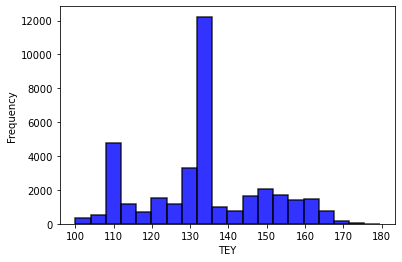

NOX


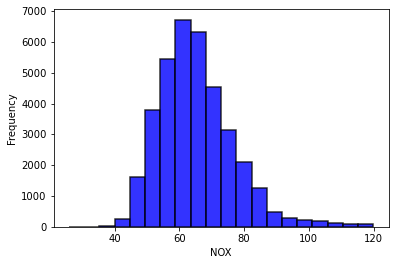

CO


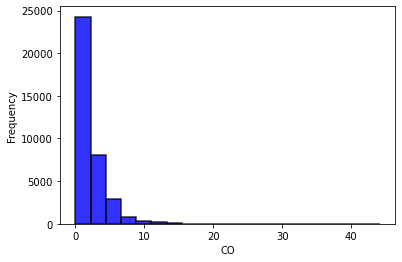

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

numerical_features = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','NOX','CO']
for i in numerical_features:
    print(i)
    plt.hist(concat[i],bins=20, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()
    plt.savefig('Q3_'+i+'.png',dpi=50,bbox_inches='tight')

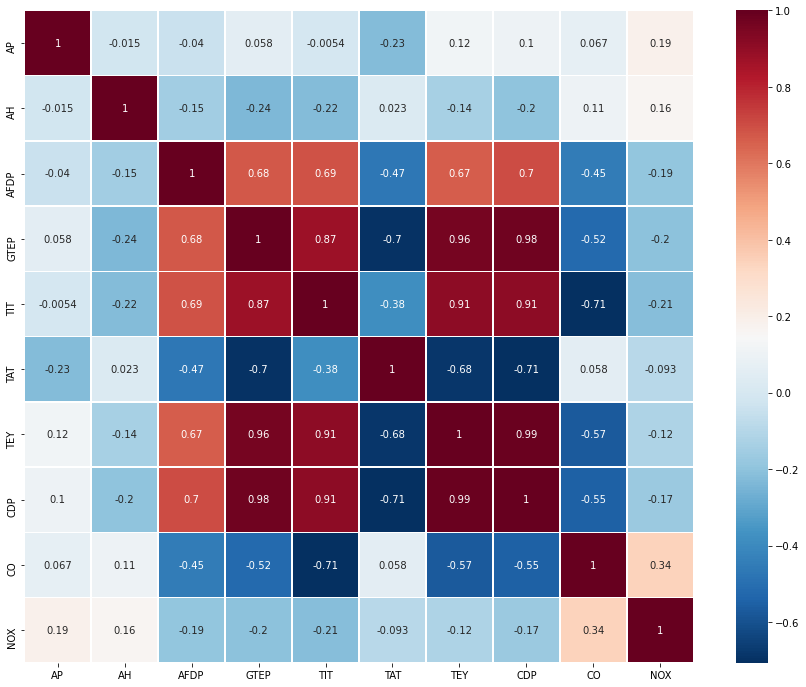

In [10]:
import seaborn as sns
corr = concat.iloc[:,1:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, linewidths=0.5,cmap="RdBu_r",annot=True)
plt.savefig('Q2a.png',dpi=200,bbox_inches='tight')

In [11]:
dataset1 = pd.read_csv("diamonds.csv")
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [12]:
#Numerical Encodings

cut_dict = {'Fair' : 1,
           'Good' : 2,
           'Very Good': 3,
           'Premium': 4,
           'Ideal': 5}

color_dict = {'J' : 1,
           'I' : 2,
           'H': 3,
           'G': 4,
           'F': 5,
           'E': 6,
           'D': 7}


clarity_dict = {'I1' : 1,
           'SI2' : 2,
           'SI1': 3,
           'VS2': 4,
           'VS1': 5,
           'VVS2': 6,
           'VVS1': 7,
           'IF': 8}



In [13]:
dataset2 = dataset1.copy(deep=True)
dataset2['cut_encoded'] = dataset2.cut.map(cut_dict)
dataset2['color_encoded'] = dataset2.color.map(color_dict)
dataset2['clarity_encoded'] = dataset2.clarity.map(clarity_dict)

In [14]:
diamonds = dataset2.copy(deep=True)

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [16]:
diamonds = diamonds.drop(columns=['cut','color','clarity'])

In [17]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,338,4.34,4.35,2.75,2,1,2


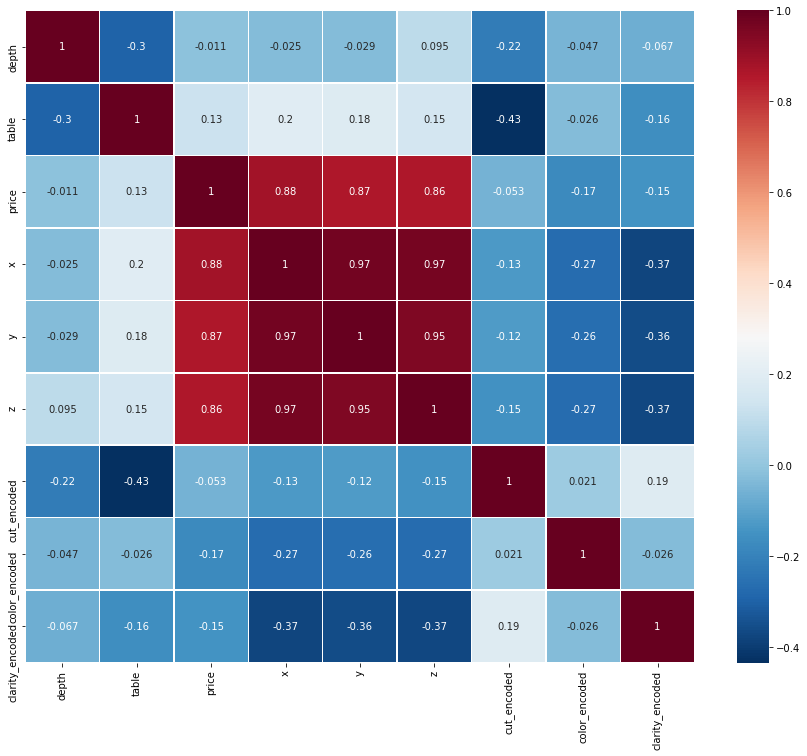

In [18]:
import seaborn as sns
corr1 = diamonds.iloc[:,1:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr1, linewidths=0.5,cmap="RdBu_r",annot=True)
plt.savefig('Q2b.png',dpi=200,bbox_inches='tight')

cut


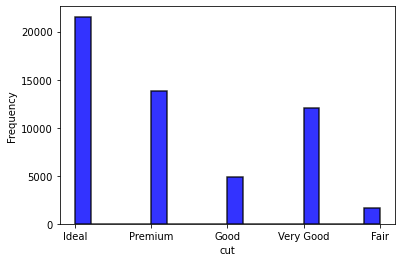

color


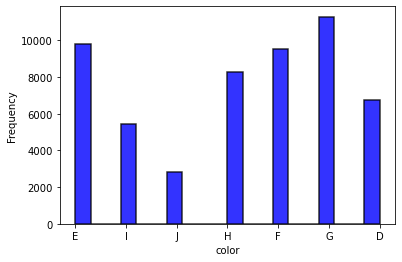

clarity


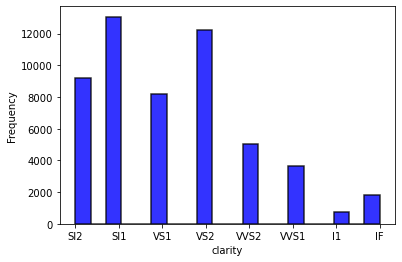

price


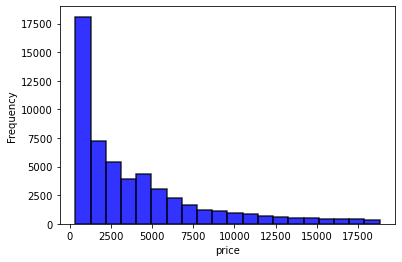

In [19]:
import matplotlib.pyplot as plt

numerical_features = ['cut','color','clarity','price']
for i in numerical_features:
    print(i)
    plt.hist(dataset1[i],bins=20, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

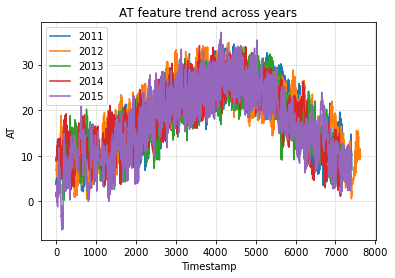

In [20]:
plt.plot(np.arange(1,7412,1),dataset2_11['AT'])
plt.plot(np.arange(1,7629,1),dataset2_12['AT'])
plt.plot(np.arange(1,7153,1),dataset2_13['AT'])
plt.plot(np.arange(1,7159,1),dataset2_14['AT'])
plt.plot(np.arange(1,7385,1),dataset2_15['AT'])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel('AT')
plt.title('AT feature trend across years')
plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

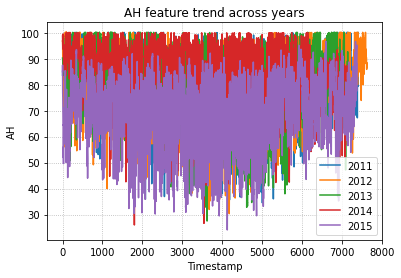

In [27]:
plt.plot(np.arange(1,7412,1),dataset2_11['AH'])
plt.plot(np.arange(1,7629,1),dataset2_12['AH'])
plt.plot(np.arange(1,7153,1),dataset2_13['AH'])
plt.plot(np.arange(1,7159,1),dataset2_14['AH'])
plt.plot(np.arange(1,7385,1),dataset2_15['AH'])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel('AH')
plt.title('AH feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

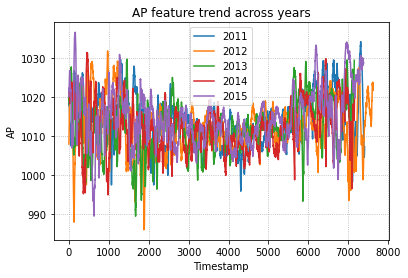

In [28]:
plt.plot(np.arange(1,7412,1),dataset2_11['AP'])
plt.plot(np.arange(1,7629,1),dataset2_12['AP'])
plt.plot(np.arange(1,7153,1),dataset2_13['AP'])
plt.plot(np.arange(1,7159,1),dataset2_14['AP'])
plt.plot(np.arange(1,7385,1),dataset2_15['AP'])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel('AP')
plt.title('AP feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

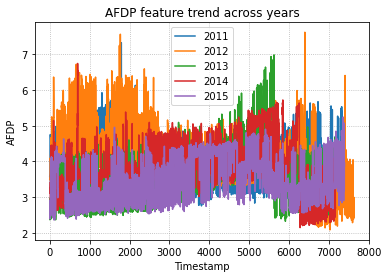

In [29]:
x = 'AFDP'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('AFDP feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

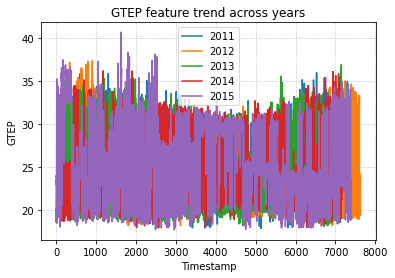

In [30]:
x = 'GTEP'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('GTEP feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

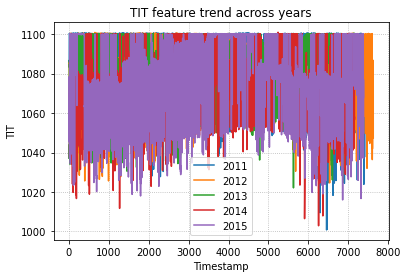

In [31]:
x = 'TIT'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('TIT feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

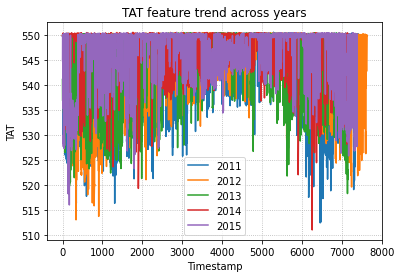

In [32]:
x = 'TAT'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('TAT feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

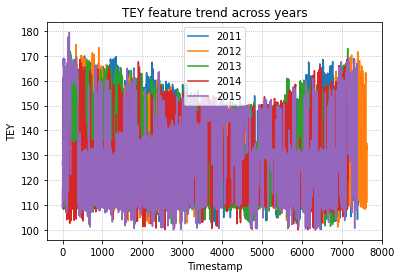

In [33]:
x = 'TEY'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('TEY feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

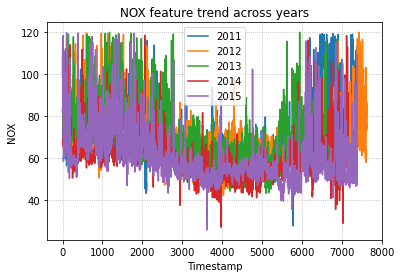

In [34]:
x = 'NOX'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('NOX feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()

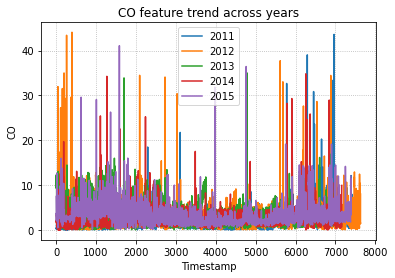

In [35]:
x = 'CO'
plt.plot(np.arange(1,7412,1),dataset2_11[x])
plt.plot(np.arange(1,7629,1),dataset2_12[x])
plt.plot(np.arange(1,7153,1),dataset2_13[x])
plt.plot(np.arange(1,7159,1),dataset2_14[x])
plt.plot(np.arange(1,7385,1),dataset2_15[x])

plt.legend(['2011','2012','2013','2014','2015'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Timestamp')
plt.ylabel(x)
plt.title('CO feature trend across years')
#plt.savefig('Q5.png',dpi=200,bbox_inches='tight')
plt.show()